#### **Import Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.regularizers import l2
from keras.layers import Dense,Activation,Embedding,Flatten,LeakyReLU,BatchNormalization,Dropout,Input
from keras.activations import relu, sigmoid
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,RandomForestRegressor
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier

#### **Data Import and Preprocessing**

In [ ]:
data = pd.read_csv("/content/Combined_Flights_2018.csv")
print(data.shape)
data.head()

(1048575, 27)


,Airline,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,DepDel15,CRSArrTime,ArrTime,...,Month,DayOfWeek,Flight,OriginCityName,OriginStateName,DestCityName,DestStateName,TaxiOut,TaxiIn,DivAirportLandings
0,Endeavor Air Inc.,False,False,1202,1157.0,0.0,-5.0,0.0,1304,1256.0,...,1,2,9E_N8928A_3298,Albany,Georgia,Atlanta,Georgia,14.0,7.0,0
1,Endeavor Air Inc.,False,False,1202,1157.0,0.0,-5.0,0.0,1304,1258.0,...,1,3,9E_N800AY_3298,Albany,Georgia,Atlanta,Georgia,13.0,12.0,0
2,Endeavor Air Inc.,False,False,1202,1153.0,0.0,-9.0,0.0,1304,1302.0,...,1,4,9E_N8836A_3298,Albany,Georgia,Atlanta,Georgia,18.0,11.0,0
3,Endeavor Air Inc.,False,False,1202,1150.0,0.0,-12.0,0.0,1304,1253.0,...,1,5,9E_N800AY_3298,Albany,Georgia,Atlanta,Georgia,17.0,11.0,0
4,Endeavor Air Inc.,False,False,1400,1355.0,0.0,-5.0,0.0,1500,1459.0,...,1,6,9E_N8839E_3298,Albany,Georgia,Atlanta,Georgia,17.0,11.0,0


In [36]:
#Data preprocessing

data.replace(np.nan,0,inplace=True)
data['DayOfWeek'] = (data['DayOfWeek'] > 5).astype(int)
y1 = data['Cancelled'].astype(int)
y2 = data['Diverted'].astype(int)
y3 = data['DepDel15'].astype(int)
y4 = data['ArrDel15'].astype(int)
y5 = data['DayOfWeek'].astype(int)
y = pd.concat([y1,y2,y3,y4,y5],axis=1)
X = data.drop((['Cancelled','Diverted','DepDel15','ArrDel15','DayOfWeek','Airline','Flight','OriginCityName','OriginStateName','DestCityName','DestStateName' ]), axis=1)

#### **Feature Importance**

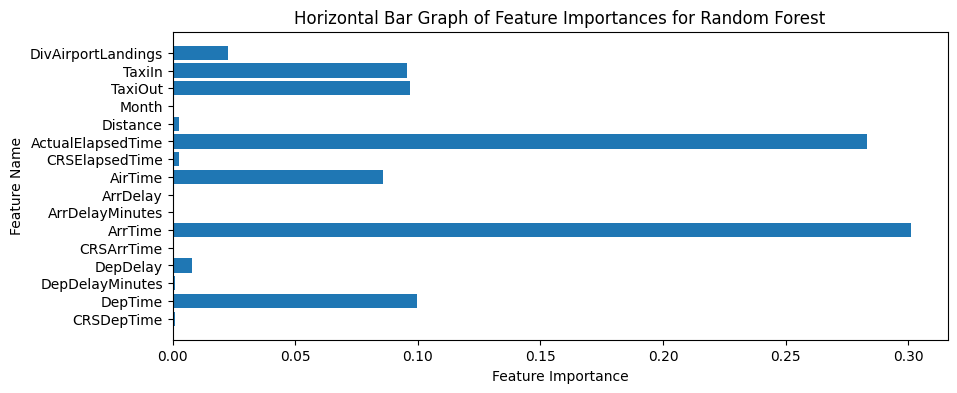

Current Classifier: Random Forest , Score: 0.9999


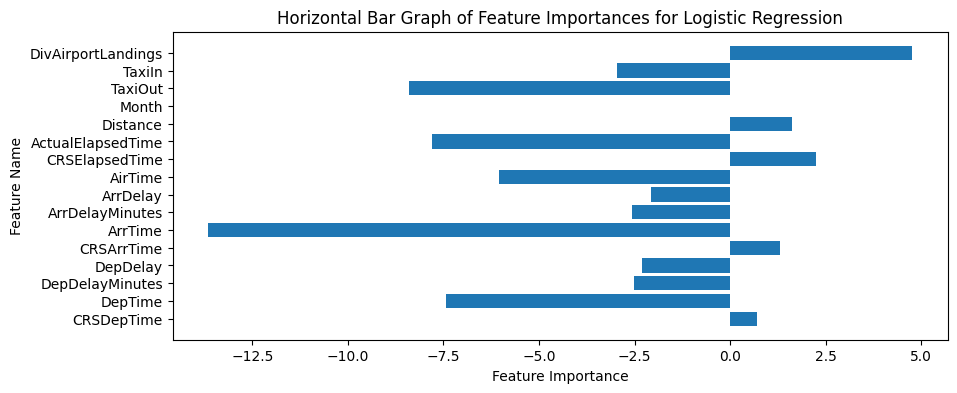

Current Classifier: Logistic Regression , Score: 0.9995


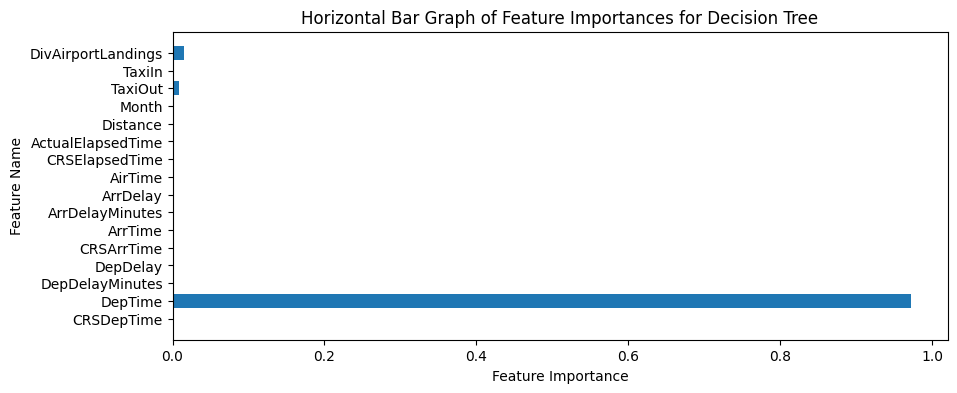

Current Classifier: Decision Tree , Score: 0.9999
The best classifier is Decision Tree with a score of 0.9999


In [ ]:
#Temporary Train Test Split 
X_train_tmp, X_test_tmp, y_train_tmp, y_test_tmp = train_test_split(X, y, test_size=0.5, random_state=42)

#Temp normalization
temp_scaler = MinMaxScaler()

X_train_tmp_scaled = temp_scaler.fit_transform(X_train_tmp)
X_test_tmp_scaled = temp_scaler.transform(X_test_tmp)

classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

best_classifier = None
best_score = 0

for clf_name, clf in classifiers.items():
    clf.fit(X_train_tmp_scaled, y_train_tmp.iloc[:,0].values)
    feature_importance = clf.feature_importances_ if hasattr(clf, 'feature_importances_') else clf.coef_.flatten()

    # Plot of feature importances
    plt.figure(figsize=(10, 4))
    plt.barh([x for x in X.columns], feature_importance)
    plt.ylabel("Feature Name")
    plt.xlabel("Feature Importance")
    plt.title(f"Horizontal Bar Graph of Feature Importances for {clf_name}")
    plt.show()

    # Evaluate model and record best one
    score = clf.score(X_test_tmp_scaled, y_test_tmp.iloc[:,0].values)
    print(f"Current Classifier: {clf_name} , Score: {score:.4f}")

    if score > best_score:
        best_classifier = clf_name
        best_score = score

print(f"The best classifier is {best_classifier} with a score of {best_score:.4f}")

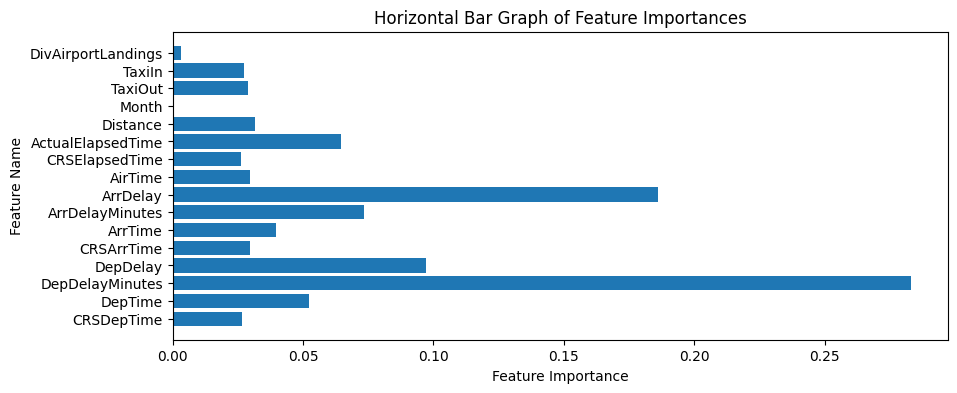

In [ ]:
#Feature Importance

#Random Forest Model  

RF_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
RF_model.fit(X, y.values)

feature_importance = RF_model.feature_importances_

#Plot of feature importances
plt.figure(figsize=(10,4))
plt.barh([x for x in X.columns], feature_importance)
plt.ylabel("Feature Name")
plt.xlabel("Feature Importance")
plt.title("Horizontal Bar Graph of Feature Importances")
plt.show()

In [ ]:
X.columns

Index(['CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'CRSArrTime',
       'ArrTime', 'ArrDelayMinutes', 'ArrDelay', 'AirTime', 'CRSElapsedTime',
       'ActualElapsedTime', 'Distance', 'Month', 'TaxiOut', 'TaxiIn',
       'DivAirportLandings'],
      dtype='object')

In [37]:
#Dropping less important columns

X = X.drop((['CRSDepTime','DepTime','CRSArrTime','ArrTime']), axis=1)

#### **Data Normalization**

In [38]:
#Train Test Split
X_train1, X_test1, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

#Normalization
scaler = StandardScaler()
#fit scaler to the training set features
scaler.fit(X_train1)
#scale the training and test set features using the transform method
X_train_scaled = scaler.transform(X_train1)
X_test_scaled = scaler.transform(X_test1)
#Converting to dataframes
X_train = pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)
X_train.columns = X_train1.columns
X_test.columns = X_test1.columns

#### **Hyper Parameter Tuning**

In [39]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes, input_dim=X_train.shape[1]))
            model.add(Activation(activation = activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation=activation))
    # Output layer 
    model.add(Dense(5, activation='relu'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

layers = [[20],[40,20],[30,20,10]]
activations = ['sigmoid','relu','tanh','softmax']
param_grid = dict(layers=layers, activation=activations, batch_size=[128,256],epochs=[5])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid_result = grid.fit(X_train, y_train)

# get the best model
best_model = grid.best_estimator_.model
[grid_result.best_score_,grid_result.best_params_]

<ipython-input-39-41e78ebcffa3>:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


[0.7196898996829987,
 {'activation': 'tanh',
  'batch_size': 128,
  'epochs': 5,
  'layers': [30, 20, 10]}]

#### **Neural Network Model**

In [ ]:
def base_model(inputs):
    x= Dense(30, activation='tanh')(inputs)
    x= Dense(20, activation='tanh')(x)
    x= Dense(10, activation='tanh')(x)
    return x
def final_model(inputs):
    x = base_model(inputs)
    Cancel = Dense(units='1',activation = 'relu',name='Cancellation')(x) 
    Divert = Dense(units = '1', activation = 'relu',name = 'Diversion')(x) 
    DepDel15 = Dense(units='1',activation = 'relu',name='DepDel15')(x) 
    ArrDel15 = Dense(units='1',activation = 'relu',name='ArrDel15')(x)
    DayOfWeek = Dense(units = '1', activation = 'relu',name = 'Weekend')(x)
                
    model = Model(inputs=inputs, outputs = [Cancel,Divert,DepDel15,ArrDel15,DayOfWeek])
    model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics='accuracy')
    return model

In [ ]:
inputs = Input(shape=(X_train.shape[1],))
model = final_model(inputs)

In [ ]:
history = model.fit(X_train,y_train,epochs=5)

Epoch 1/5
22938/22938 [==============================] - 61s 3ms/step - loss: 1.6045 - Cancellation_loss: 0.3148 - Diversion_loss: 0.3099 - DepDel15_loss: 0.3209 - ArrDel15_loss: 0.3373 - Weekend_loss: 0.3215 - Cancellation_accuracy: 0.8799 - Diversion_accuracy: 0.8816 - DepDel15_accuracy: 0.8806 - ArrDel15_accuracy: 0.8770 - Weekend_accuracy: 0.8777
Epoch 2/5
22938/22938 [==============================] - 59s 3ms/step - loss: 1.4699 - Cancellation_loss: 0.2939 - Diversion_loss: 0.2939 - DepDel15_loss: 0.2940 - ArrDel15_loss: 0.2941 - Weekend_loss: 0.2941 - Cancellation_accuracy: 0.8825 - Diversion_accuracy: 0.8825 - DepDel15_accuracy: 0.8825 - ArrDel15_accuracy: 0.8825 - Weekend_accuracy: 0.8825
Epoch 3/5
22938/22938 [==============================] - 58s 3ms/step - loss: 1.4645 - Cancellation_loss: 0.2929 - Diversion_loss: 0.2928 - DepDel15_loss: 0.2929 - ArrDel15_loss: 0.2930 - Weekend_loss: 0.2929 - Cancellation_accuracy: 0.8825 - Diversion_accuracy: 0.8825 - DepDel15_accuracy: 0.8

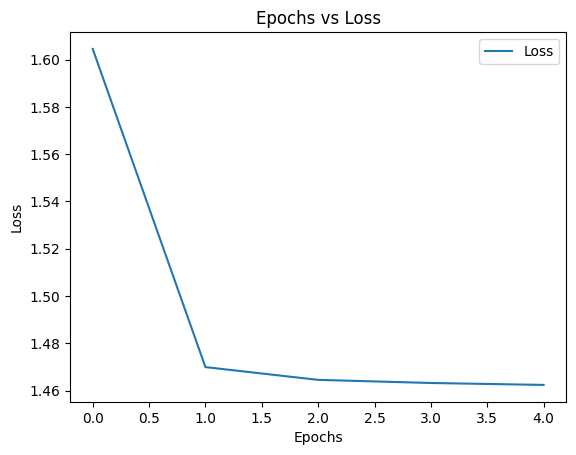

In [ ]:
loss = history.history['loss']
plt.plot(loss, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.legend()
plt.show()

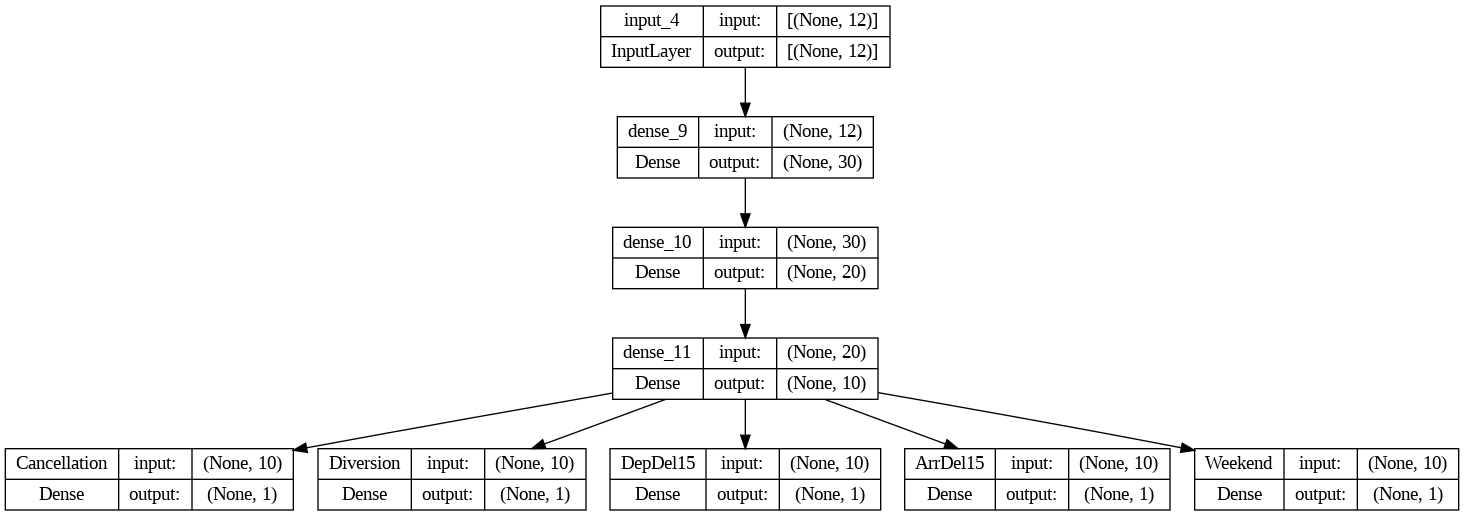

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 12)]         0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 30)           390         ['input_4[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 20)           620         ['dense_9[0][0]']                
                                                                                                  
 dense_11 (Dense)               (None, 10)           210         ['dense_10[0][0]']               
                                                                                            

In [ ]:
predictions=model.predict(X_test)

9831/9831 [==============================] - 14s 1ms/step


#### **Performance Metrics**

In [ ]:
r1 = y_test['Cancelled']
r2 = y_test['Diverted']
r3 = y_test['DepDel15']
r4 = y_test['ArrDel15']
r5 = y_test['DayOfWeek']
Cpred, Dpred, Dlpred, Arpred, Wkpred = [pd.DataFrame(predictions[i]) for i in range(5)]
Cpred, Dpred, Dlpred, Arpred, Wkpred = [(x >= 0.5).astype(int) for x in [Cpred, Dpred, Dlpred, Arpred, Wkpred]]

y1_sort, y2_sort, y3_sort, y4_sort, y5_sort = [pd.DataFrame(r.sort_index()).astype(int) for r in [r1, r2, r3, r4, r5]]
Cpred_sort, Dpred_sort, Dlpred_sort, Arpred_sort, Wkpred_sort = [df.set_index(sort.index).astype(int) for df, sort in zip([Cpred, Dpred, Dlpred, Arpred, Wkpred], [y1_sort, y2_sort, y3_sort, y4_sort, y5_sort])]

In [ ]:
metric_names = ['Cancelled', 'Diverted', 'DepDel15', 'ArrDel15', 'DayOfWeek']
pred_rounded = [(pred >= 0.5).astype(int) for pred in predictions] #pred.round() 

metric_values = []
for i, pred in enumerate(pred_rounded):
    acc = accuracy_score(pred, y_test[metric_names[i]])
    prec = precision_score(pred, y_test[metric_names[i]], average='weighted')
    rec = recall_score(pred, y_test[metric_names[i]], average='weighted', zero_division=1)
    f1 = f1_score(pred, y_test[metric_names[i]], average='weighted')
    metric_values.append([acc, prec, rec, f1])

metrics_df1 = pd.DataFrame(metric_values, columns=['Accuracy', 'Precision', 'Recall', 'F1-score'], index=metric_names)

print(metrics_df1)

           Accuracy  Precision    Recall  F1-score
Cancelled  0.892928   0.825694  0.892928  0.857716
Diverted   0.904817   0.823231  0.904817  0.861682
DepDel15   0.758485   0.831510  0.758485  0.793181
ArrDel15   0.842237   0.847752  0.842237  0.844818
DayOfWeek  0.613508   0.595302  0.613508  0.603549


#### **Confusion Matrix**

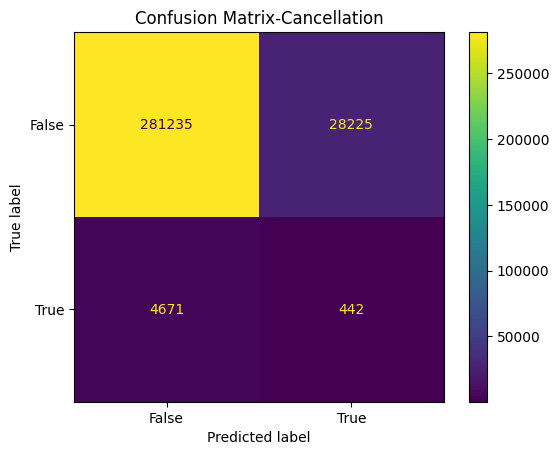

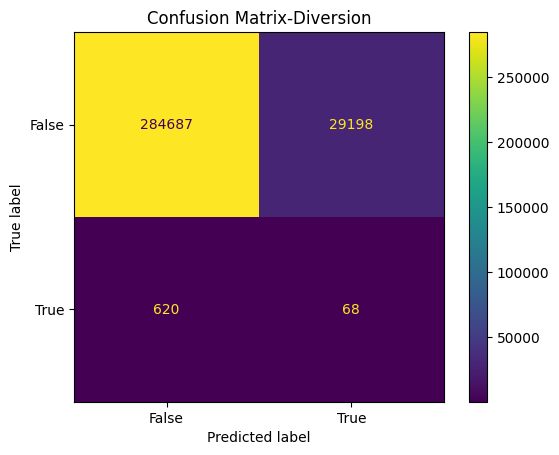

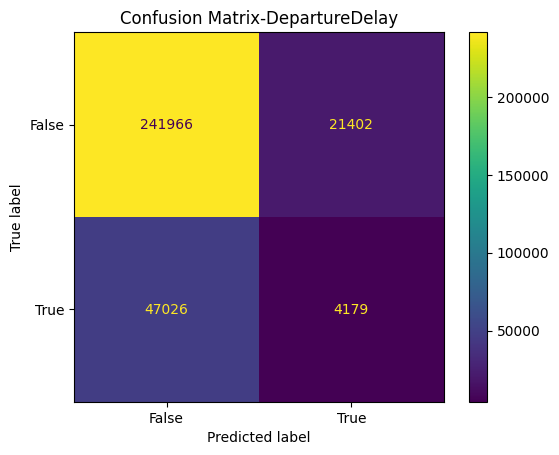

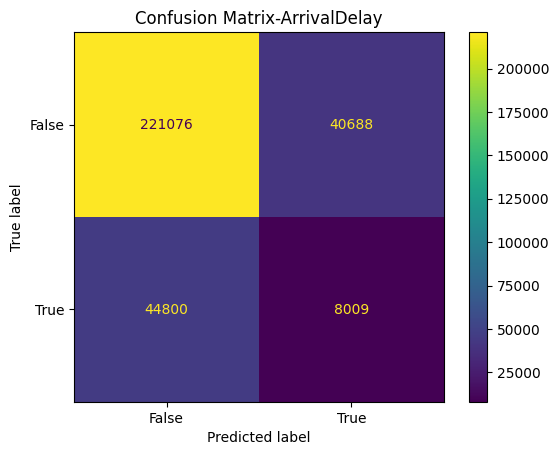

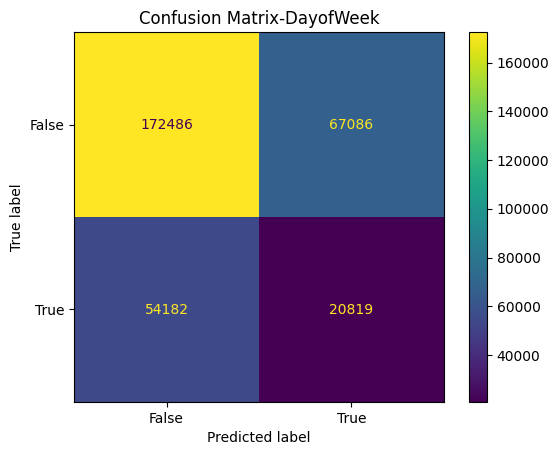

In [ ]:
#Confusion Matrix
# for i, x in enumerate([Cpred, Dpred, Dlpred, Arpred, Wkpred]):
#   cm = confusion_matrix(y_test.iloc[:,i].values, x)
#   labels = ['True', 'False']
#   cm_plot = ConfusionMatrixDisplay(cm, display_labels = labels)
#   cm_plot.plot()
#   cm_plot.ax_.set_title("{} Confusion Matrix".format(y_train.columns[i]))

confusion_matrices = [(y1_sort, Cpred_sort, "Cancellation"), (y2_sort, Dpred_sort, "Diversion"),
(y3_sort, Dlpred_sort, "DepartureDelay"), (y4_sort, Arpred_sort, "ArrivalDelay"),
(y5_sort, Wkpred_sort, "DayofWeek")]

for y_true, y_pred, title in confusion_matrices:
  cm = confusion_matrix(y_true, y_pred)
  cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
  cm_display.plot()
  cm_display.ax_.set_title(f"Confusion Matrix-{title}")
  plt.show()